In [1]:
# Importing the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import plotly.graph_objects as go

In [2]:
# Importing the dataset
dataset = pd.read_csv('FIFA-19_Player_data.csv')

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 89 columns):
Unnamed: 0                  18207 non-null int64
ID                          18207 non-null int64
Name                        18207 non-null object
Age                         18207 non-null int64
Photo                       18207 non-null object
Nationality                 18207 non-null object
Flag                        18207 non-null object
Overall                     18207 non-null int64
Potential                   18207 non-null int64
Club                        17966 non-null object
Club Logo                   18207 non-null object
Value                       18207 non-null object
Wage                        18207 non-null object
Special                     18207 non-null int64
Preferred Foot              18159 non-null object
International Reputation    18159 non-null float64
Weak Foot                   18159 non-null float64
Skill Moves                 18159 non-null fl

In [4]:
# Viewing the top 10 rows of the dataset
dataset.head(10)

Unnamed: 0      ID               Name  Age  \
0           0  158023           L. Messi   31   
1           1   20801  Cristiano Ronaldo   33   
2           2  190871          Neymar Jr   26   
3           3  193080             De Gea   27   
4           4  192985       K. De Bruyne   27   
5           5  183277          E. Hazard   27   
6           6  177003          L. Modrić   32   
7           7  176580          L. Suárez   31   
8           8  155862       Sergio Ramos   32   
9           9  200389           J. Oblak   25   

                                            Photo Nationality  \
0  https://cdn.sofifa.org/players/4/19/158023.png   Argentina   
1   https://cdn.sofifa.org/players/4/19/20801.png    Portugal   
2  https://cdn.sofifa.org/players/4/19/190871.png      Brazil   
3  https://cdn.sofifa.org/players/4/19/193080.png       Spain   
4  https://cdn.sofifa.org/players/4/19/192985.png     Belgium   
5  https://cdn.sofifa.org/players/4/19/183277.png     Belgium   
6  https://cdn.sofifa.org/players/4/19/177003.png     Croatia   
7  https://cdn.sofifa.org/players/4/19/176580.png     Uruguay   
8  https://cdn.sofifa.org/players/4/19/155862.png       Spain   
9  https://cdn.sofifa.org/players/4/19/200389.png    Slovenia   

                                  Flag  Overall  Potential  \
0  https://cdn.sofifa.org/flags/52.png       94         94   
1  https://cdn.sofifa.org/flags/38.png       94         94   
2  https://cdn.sofifa.org/flags/54.png       92         93   
3  https://cdn.sofifa.org/flags/45.png       91         93   
4   https://cdn.sofifa.org/flags/7.png       91         92   
5   https://cdn.sofifa.org/flags/7.png       91         91   
6  https://cdn.sofifa.org/flags/10.png       91         91   
7  https://cdn.sofifa.org/flags/60.png       91         91   
8  https://cdn.sofifa.org/flags/45.png       91         91   
9  https://cdn.sofifa.org/flags/44.png       90         93   

                  Club  ... Composure Marking StandingTackle  SlidingTackle  \
0         FC Barcelona  ...      96.0    33.0           28.0           26.0   
1             Juventus  ...      95.0    28.0           31.0           23.0   
2  Paris Saint-Germain  ...      94.0    27.0           24.0           33.0   
3    Manchester United  ...      68.0    15.0           21.0           13.0   
4      Manchester City  ...      88.0    68.0           58.0           51.0   
5              Chelsea  ...      91.0    34.0           27.0           22.0   
6          Real Madrid  ...      84.0    60.0           76.0           73.0   
7         FC Barcelona  ...      85.0    62.0           45.0           38.0   
8          Real Madrid  ...      82.0    87.0           92.0           91.0   
9      Atlético Madrid  ...      70.0    27.0           12.0           18.0   

  GKDiving  GKHandling  GKKicking  GKPositioning GKReflexes Release Clause  
0      6.0        11.0       15.0           14.0        8.0        €226.5M  
1      7.0        11.0       15.0           14.0       11.0        €127.1M  
2      9.0         9.0       15.0           15.0       11.0        €228.1M  
3     90.0        85.0       87.0           88.0       94.0        €138.6M  
4     15.0        13.0        5.0           10.0       13.0        €196.4M  
5     11.0        12.0        6.0            8.0        8.0        €172.1M  
6     13.0         9.0        7.0           14.0        9.0        €137.4M  
7     27.0        25.0       31.0           33.0       37.0          €164M  
8     11.0         8.0        9.0            7.0       11.0        €104.6M  
9     86.0        92.0       78.0           88.0       89.0        €144.5M  

[10 rows x 89 columns]

In [5]:
# Viewing statistics of all numerical columns in the dataset
dataset.describe()

Unnamed: 0             ID           Age       Overall     Potential  \
count  18207.000000   18207.000000  18207.000000  18207.000000  18207.000000   
mean    9103.000000  214298.338606     25.122206     66.238699     71.307299   
std     5256.052511   29965.244204      4.669943      6.908930      6.136496   
min        0.000000      16.000000     16.000000     46.000000     48.000000   
25%     4551.500000  200315.500000     21.000000     62.000000     67.000000   
50%     9103.000000  221759.000000     25.000000     66.000000     71.000000   
75%    13654.500000  236529.500000     28.000000     71.000000     75.000000   
max    18206.000000  246620.000000     45.000000     94.000000     95.000000   

            Special  International Reputation     Weak Foot   Skill Moves  \
count  18207.000000              18159.000000  18159.000000  18159.000000   
mean    1597.809908                  1.113222      2.947299      2.361308   
std      272.586016                  0.394031      0.660456      0.756164   
min      731.000000                  1.000000      1.000000      1.000000   
25%     1457.000000                  1.000000      3.000000      2.000000   
50%     1635.000000                  1.000000      3.000000      2.000000   
75%     1787.000000                  1.000000      3.000000      3.000000   
max     2346.000000                  5.000000      5.000000      5.000000   

       Jersey Number  ...     Penalties     Composure       Marking  \
count   18147.000000  ...  18159.000000  18159.000000  18159.000000   
mean       19.546096  ...     48.548598     58.648274     47.281623   
std        15.947765  ...     15.704053     11.436133     19.904397   
min         1.000000  ...      5.000000      3.000000      3.000000   
25%         8.000000  ...     39.000000     51.000000     30.000000   
50%        17.000000  ...     49.000000     60.000000     53.000000   
75%        26.000000  ...     60.000000     67.000000     64.000000   
max        99.000000  ...     92.000000     96.000000     94.000000   

       StandingTackle  SlidingTackle      GKDiving    GKHandling  \
count    18159.000000   18159.000000  18159.000000  18159.000000   
mean        47.697836      45.661435     16.616223     16.391596   
std         21.664004      21.289135     17.695349     16.906900   
min          2.000000       3.000000      1.000000      1.000000   
25%         27.000000      24.000000      8.000000      8.000000   
50%         55.000000      52.000000     11.000000     11.000000   
75%         66.000000      64.000000     14.000000     14.000000   
max         93.000000      91.000000     90.000000     92.000000   

          GKKicking  GKPositioning    GKReflexes  
count  18159.000000   18159.000000  18159.000000  
mean      16.232061      16.388898     16.710887  
std       16.502864      17.034669     17.955119  
min        1.000000       1.000000      1.000000  
25%        8.000000       8.000000      8.000000  
50%       11.000000      11.000000     11.000000  
75%       14.000000      14.000000     14.000000  
max       91.000000      90.000000     94.000000  

[8 rows x 44 columns]

In [6]:
# Fetching the maximum overall rating for all the given countries
df = dataset.groupby(['Nationality'], as_index=False)['Overall'].max()

In [7]:
df

Nationality  Overall
0    Afghanistan       63
1        Albania       81
2        Algeria       85
3        Andorra       62
4         Angola       78
..           ...      ...
159   Uzbekistan       75
160    Venezuela       81
161        Wales       88
162       Zambia       73
163     Zimbabwe       78

[164 rows x 2 columns]

In [8]:
data = dict(type = 'choropleth',
            locations = df['Nationality'],
            locationmode = 'country names',
            colorscale = 'Viridis',
            autocolorscale=False,
            z=df['Overall'],
            text = df["Nationality"],
            colorbar = {'title':'Overall rating'})

In [9]:
layout = dict(geo = {'scope':'north america'},title="Maximum overall rating for countries in North America")

In [10]:
import plotly.graph_objs as gobj
col_map = gobj.Figure(data = [data],layout = layout)

In [11]:
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)
iplot(col_map)

In [12]:
layout = dict(geo = {'scope':'south america'},title="Maximum overall rating for countries in South America")
col_map = gobj.Figure(data = [data],layout = layout)
init_notebook_mode(connected=True)
iplot(col_map)

In [13]:
layout = dict(geo = {'scope':'europe'},title="Maximum overall rating for countries in Europe")
col_map = gobj.Figure(data = [data],layout = layout)
init_notebook_mode(connected=True)
iplot(col_map)

In [14]:
layout = dict(geo = {'scope':'asia'},title="Maximum overall rating for countries in Asia")
col_map = gobj.Figure(data = [data],layout = layout)
init_notebook_mode(connected=True)
iplot(col_map)

In [15]:
layout = dict(geo = {'scope':'africa'},title="Maximum overall rating for countries in Africa")
col_map = gobj.Figure(data = [data],layout = layout)
init_notebook_mode(connected=True)
iplot(col_map)

In [16]:
layout = dict(geo = {'scope':'world'},title="Maximum overall rating country-wise across the world")
col_map = gobj.Figure(data = [data],layout = layout)
init_notebook_mode(connected=True)
iplot(col_map)

<div class="alert alert-block alert-info">
<b>Insight:</b> Highest rated players across the world are from countries including Brazil, Argentina, 
    Uruguay, Portugal, Spain, France, Germany and Poland.
</div>

In [17]:
#Visualisation - Age vs Overall
import plotly.express as px
fig = px.scatter(dataset, x='Age', y='Overall',title = "Age vs Overall Rating correlation")
fig.update_traces(marker=dict(size=8,line=dict(width=1.5,color='blue')),selector=dict(mode='markers'))
fig.update_xaxes(title_text='Age of FIFA players')
fig.update_yaxes(title_text='Overall rating of players')
fig.show()

<div class="alert alert-block alert-info">
<b>Insight:</b> As we can decipher from the above plot, most of the highest rated players fall in the age bracket of 25-33.
</div>

In [18]:
#Visualisation - Age vs Potential
fig = px.scatter(dataset, x='Age', y='Potential',title = "Age vs Potential correlation")
fig.update_traces( marker=dict(color='lawngreen',line=dict(width=1.5,color='black'),size=8))              
fig.update_xaxes(title_text='Age of FIFA players')
fig.update_yaxes(title_text='Potential of players')
fig.show()

<div class="alert alert-block alert-info">
<b>Insight:</b> Unlike majority of overall high rated players , high potential players are spread across a wider 
    age bracket ranging from 17 years to 33 years. 
</div>

In [19]:
df1 = dataset.filter(['Preferred Foot'], axis=1)

In [20]:
df1 = df1.dropna()

In [21]:
df1 = df1.groupby(['Preferred Foot']).size().reset_index(name='count')

In [22]:
df1

Preferred Foot  count
0           Left   4211
1          Right  13948

In [23]:
#Visualisation - Preferred Foot of FIFA Players
fig = px.pie(df1, values='count',names = 'Preferred Foot',title='Preferred Foot of FIFA Players')
fig.show()

In [24]:
df2 = dataset.filter(['Position'], axis=1)

In [25]:
df2 = df2.dropna()

In [26]:
df2 = df2.groupby(['Position']).size().reset_index(name='count')

In [27]:
df2

Position  count
0       CAM    958
1        CB   1778
2       CDM    948
3        CF     74
4        CM   1394
5        GK   2025
6       LAM     21
7        LB   1322
8       LCB    648
9       LCM    395
10      LDM    243
11       LF     15
12       LM   1095
13       LS    207
14       LW    381
15      LWB     78
16      RAM     21
17       RB   1291
18      RCB    662
19      RCM    391
20      RDM    248
21       RF     16
22       RM   1124
23       RS    203
24       RW    370
25      RWB     87
26       ST   2152

In [28]:
# Visualising the positions played by different FIFA players
df2.loc[df2['count'] < 300, 'Position'] = 'Other positions'
fig = px.pie(df2, values='count',names = 'Position',title='Positions of FIFA Players')
fig.show()

<div class="alert alert-block alert-info">
<b>Insight:</b> The most common positions played by the footballers include ST,GK,CB,CM,LB and RB. 
</div> 

In [29]:
# Visualising - Age vs shot power correlation
fig = px.box(dataset, x="ShotPower", y="Age",title = 'Age vs Shot correlation')
fig.update_traces( marker=dict(color='crimson'))
fig.show()

<div class="alert alert-block alert-info">
<b>Insight:</b> The median age of players with high shot power (greater than 80) ranges from 26 to 33. Interestingly, the 
    median age of players with low shot power (less than 20) ranges from 23 to 31.
</div>

In [30]:
df3 = dataset.filter(['Age','Wage','Potential'], axis=1)

In [31]:
df3

Age   Wage  Potential
0       31  €565K         94
1       33  €405K         94
2       26  €290K         93
3       27  €260K         93
4       27  €355K         92
...    ...    ...        ...
18202   19    €1K         65
18203   19    €1K         63
18204   16    €1K         67
18205   17    €1K         66
18206   16    €1K         66

[18207 rows x 3 columns]

In [32]:
df3['Wage'] = df3['Wage'].str.replace('€', '').str.replace('K','').astype(int)

In [33]:
df3.isnull().values.any()

False

In [34]:
df3

Age  Wage  Potential
0       31   565         94
1       33   405         94
2       26   290         93
3       27   260         93
4       27   355         92
...    ...   ...        ...
18202   19     1         65
18203   19     1         63
18204   16     1         67
18205   17     1         66
18206   16     1         66

[18207 rows x 3 columns]

In [35]:
# Visualisation- Age vs wage correlation
fig = px.scatter(df3, x='Age', y='Wage',title = "Age vs Wage correlation")
fig.update_traces(marker=dict(size=8,color = '#EB89B5',line=dict(width=1.5,color='fuchsia')),selector=dict(mode='markers'))
fig.update_xaxes(title_text='Age of FIFA players')
fig.update_yaxes(title_text='Wage of players in Thousand Euros')
fig.show()

<div class="alert alert-block alert-info">
<b>Insight:</b> We see a rise in wage till the age bracket of 25-30 years after which we observe a decline in wage. 
    Also, we see a few players within the age bracket of 30-35 with exceptionally high wages and these are top five 
    earning players in the dataset. 
</div>

In [36]:
# Visualsing - Potential vs wage correlation
fig = px.scatter(df3, x='Potential', y='Wage',title = "Potential vs Wage correlation")
fig.update_traces(marker=dict(size=8,color = 'orange',line=dict(width=1.5,color='red')),selector=dict(mode='markers'))
fig.update_xaxes(title_text='Potential of FIFA players')
fig.update_yaxes(title_text='Wage of players in Thousand Euros')
fig.show()

<div class="alert alert-block alert-info">
<b>Insight:</b> With increase in potential of players, there is an increase in the wage. However, there are a few exceptions
    for eg. players with potential greater than 90 and wage less than 200. 
</div>

In [37]:
# Total number of distinct clubs in the dataset
len(dataset['Club'].unique())

652

In [38]:
df = dataset.groupby(['Club'], as_index=False)['Overall'].mean()
df['Overall'] = round(df['Overall'],2)
top25Clubs = df.sort_values('Overall',ascending=False).head(25)

In [39]:
# Visualising top 25 clubs based on the average overall rating of the players
fig = px.bar(top25Clubs, x='Club', y='Overall', title="Top 25 Clubs based on the average Overall rating of the players",\
            color_discrete_sequence=['teal']) 
fig.update_yaxes(title_text='Average Overall rating')
fig.update_xaxes(title_text='Clubs')
fig.show()

In [40]:
temp = dataset[dataset['Value'].str.contains('M')]
temp = temp.filter(['Value','Club','Nationality'], axis=1)
temp

Value                 Club Nationality
0      €110.5M         FC Barcelona   Argentina
1         €77M             Juventus    Portugal
2      €118.5M  Paris Saint-Germain      Brazil
3         €72M    Manchester United       Spain
4        €102M      Manchester City     Belgium
...        ...                  ...         ...
11323      €1M     Monarcas Morelia      Mexico
11457      €1M            AS Monaco      France
11566      €1M          AD Alcorcón       Spain
11682      €1M         Swansea City       Wales
11835      €1M   Real Valladolid CF       Spain

[6847 rows x 3 columns]

In [41]:
temp['Value'] = temp['Value'].str.replace('€', '').str.replace('M','').astype(float)
temp

Value                 Club Nationality
0      110.5         FC Barcelona   Argentina
1       77.0             Juventus    Portugal
2      118.5  Paris Saint-Germain      Brazil
3       72.0    Manchester United       Spain
4      102.0      Manchester City     Belgium
...      ...                  ...         ...
11323    1.0     Monarcas Morelia      Mexico
11457    1.0            AS Monaco      France
11566    1.0          AD Alcorcón       Spain
11682    1.0         Swansea City       Wales
11835    1.0   Real Valladolid CF       Spain

[6847 rows x 3 columns]

In [42]:
# Visualising the richest clubs in the dataset
temp.loc[temp['Value'] < 50.0, 'Club'] = 'Other clubs'
result = temp.groupby('Club').sum().sort_values('Value',ascending=False)
vls = result['Value'].values.tolist()
totalCount = []
lbl = []
for i in range(0,len(vls)):
    totalCount.append(vls[i])
    total = sum(totalCount)
for j in range(0,len(vls)):
    percentage=float((vls[j]/total)*100)
    lbl.append(str(result.index.values[j] +" "+str(round(percentage,2))+"%"))
labels = lbl
layout = dict(title="Value (in million €) of various Clubs")
fig = go.Figure(data=[go.Pie(labels=labels,values=result.Value)],layout=layout)
fig.update_traces(hoverinfo='value+label',textinfo='none')
fig.show()

In [43]:
# Visualising- Aggregate national value in million Euros
temp.loc[temp['Value'] < 50.0, 'Nationality'] = 'Other nations'
result = temp.groupby('Nationality').sum().sort_values('Value',ascending=False)
vls = result['Value'].values.tolist()
totalCount = []
lbl = []
for i in range(0,len(vls)):
    totalCount.append(vls[i])
    total = sum(totalCount)
for j in range(0,len(vls)):
    percentage=float((vls[j]/total)*100)
    lbl.append(str(result.index.values[j] +" "+str(round(percentage,2))+"%"))
labels = lbl
layout = dict(title="Aggregate national value (in million €)")
fig = go.Figure(data=[go.Pie(labels=labels,values=result.Value)],layout=layout)
fig.update_traces(hoverinfo='value+label',textinfo='none')
fig.show()

---

### Data Preprocessing

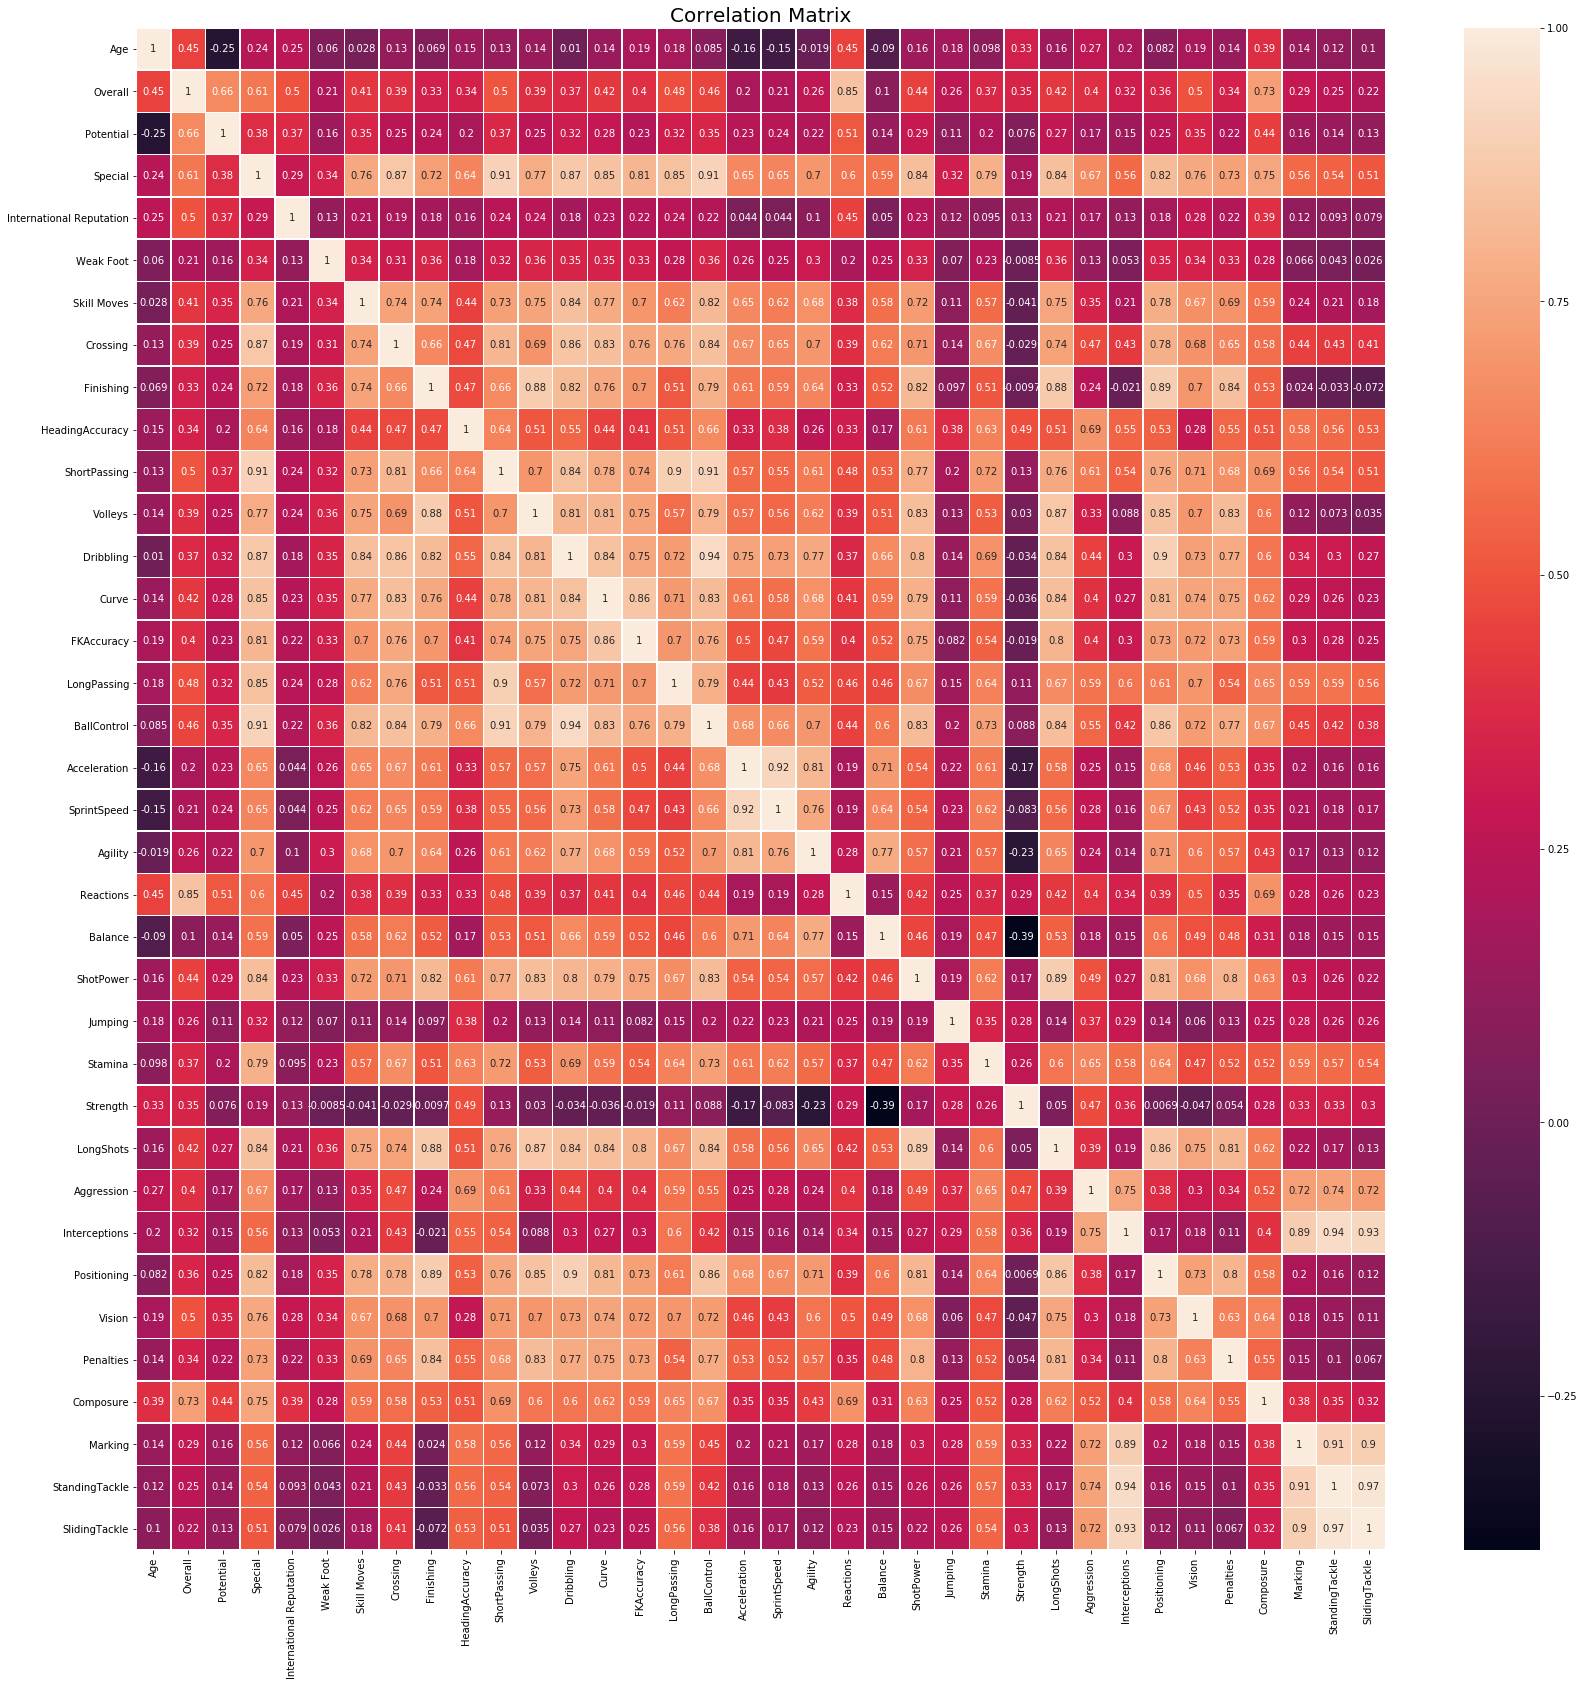

In [44]:
#Dropping unnecessary columns for creating a heatmap
hm = dataset.drop(['Unnamed: 0','ID','Jersey Number','Contract Valid Until','GKDiving',
                  'GKHandling','GKKicking','GKPositioning','GKReflexes'],axis=1)
## Determining the relevancy of features using heatmap in calculating the outcome variable
corrmat = hm.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(28,28))
#Plotting heat map
g=sns.heatmap(hm[top_corr_features].corr(),annot=True,linewidths=.5)
b, t = plt.ylim() 
b += 0.5
t -= 0.5 
plt.ylim(b, t)
plt.title('Correlation Matrix',fontdict = {'fontsize' : 20})
plt.show() 

In [45]:
# Dropping all null values from the feature columns
dataset = dataset.dropna(axis=0, subset=['Reactions','Composure','International Reputation','ShortPassing'
            ,'Vision','LongPassing','BallControl'])

In [46]:
# Splitting the dataset into features and outcome variable(Overall)
y = dataset.iloc[:,7].values
# Picking up the top ten most useful features based on the above heatmap 
x = dataset[['Age','Special','Reactions','Composure','Potential','International Reputation','ShortPassing'
            ,'Vision','LongPassing','BallControl']].values
print(x)

[[  31. 2202.   95. ...   94.   87.   96.]
 [  33. 2228.   96. ...   82.   77.   94.]
 [  26. 2143.   94. ...   87.   78.   95.]
 ...
 [  16. 1189.   47. ...   43.   28.   44.]
 [  17. 1228.   21. ...   47.   32.   52.]
 [  16. 1321.   51. ...   49.   44.   51.]]


---

In [47]:
# Splitting the dataset into training and test set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

---

### Multiple Linear Regression

In [48]:
## Training the multiple linear regression on the training set
from sklearn.linear_model import LinearRegression
regressor_MultiLinear = LinearRegression()
regressor_MultiLinear.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [49]:
## Predicting test results
y_pred = regressor_MultiLinear.predict(x_test)

In [50]:
# Calculating r2 score
from sklearn.metrics import r2_score
r2_MultiLinear = r2_score(y_test,y_pred)
print(r2_MultiLinear)

0.8983024312518929


---

### Polynomial Regression

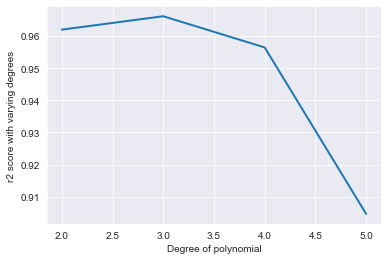

In [51]:
## Finding out the optimal degree of polynomial regression
from sklearn.preprocessing import PolynomialFeatures
sns.set_style('darkgrid')
scores_list = []
pRange = range(2,6)
for i in pRange :
    poly_reg = PolynomialFeatures(degree=i)
    x_poly = poly_reg.fit_transform(x_train)
    poly_regressor = LinearRegression()
    poly_regressor.fit(x_poly,y_train)
    y_pred = poly_regressor.predict(poly_reg.fit_transform(x_test))
    scores_list.append(r2_score(y_test,y_pred))
plt.plot(pRange,scores_list,linewidth=2)
plt.xlabel('Degree of polynomial')
plt.ylabel('r2 score with varying degrees')
plt.show()

In [52]:
## Training the polynomial regression on the training model
poly_reg = PolynomialFeatures(degree=3)
x_poly = poly_reg.fit_transform(x_train)
poly_regressor = LinearRegression()
poly_regressor.fit(x_poly,y_train)
y_pred = poly_regressor.predict(poly_reg.fit_transform(x_test))
r2_poly = r2_score(y_test,y_pred)
print(r2_poly)

0.9661664810069419


---

### K-Nearest Neighbors Regression

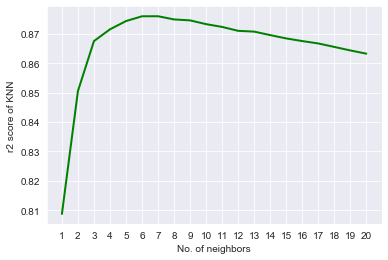

In [53]:
## Finding the optimal number of neighbors for KNN regression
from sklearn.neighbors import KNeighborsRegressor
knnRange = range(1,21,1)
scores_list = []
for i in knnRange:
    regressor_knn = KNeighborsRegressor(n_neighbors=i)
    regressor_knn.fit(x_train,y_train)
    y_pred = regressor_knn.predict(x_test)
    scores_list.append(r2_score(y_test,y_pred))
plt.plot(knnRange,scores_list,linewidth=2,color='green')
plt.xticks(knnRange)
plt.xlabel('No. of neighbors')
plt.ylabel('r2 score of KNN')
plt.show()  

In [54]:
# Training the KNN model on the training set
regressor_knn = KNeighborsRegressor(n_neighbors=6)
regressor_knn.fit(x_train,y_train)
y_pred = regressor_knn.predict(x_test)
r2_knn = r2_score(y_test,y_pred)
print(r2_knn)

0.8759537325603887


---

### Decision Tree Regression

In [55]:
# Training the Decision Tree regression on the training model
from sklearn.tree import DecisionTreeRegressor
regressor_Tree = DecisionTreeRegressor(random_state=0)
regressor_Tree.fit(x_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=0, splitter='best')

In [56]:
# Predicting test results
y_pred = regressor_Tree.predict(x_test)

In [57]:
# Calculating r2 score
r2_tree = r2_score(y_test,y_pred)
print(r2_tree)

0.9250099890661768


---

### Random Forest Regression

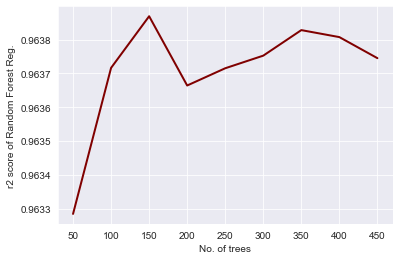

In [58]:
# Finding out the optimal number of trees for Random Forest Regression
from sklearn.ensemble import RandomForestRegressor
forestRange=range(50,500,50)
scores_list=[]
for i in forestRange: 
    regressor_Forest = RandomForestRegressor(n_estimators=i,random_state=0)
    regressor_Forest.fit(x_train,y_train)
    y_pred = regressor_Forest.predict(x_test)
    scores_list.append(r2_score(y_test,y_pred))
plt.plot(forestRange,scores_list,linewidth=2,color='maroon')
plt.xticks(forestRange)
plt.xlabel('No. of trees')
plt.ylabel('r2 score of Random Forest Reg.')
plt.show()  

In [59]:
# Training the Random Forest regression on the training model
regressor_Forest = RandomForestRegressor(n_estimators=150,random_state=0)
regressor_Forest.fit(x_train,y_train)
y_pred = regressor_Forest.predict(x_test)
r2_forest = r2_score(y_test,y_pred)
print(r2_forest)

0.9638692379354221


---

In [60]:
## Feature Scaling for SVR
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
x_train = sc_x.fit_transform(x_train)
x_test = sc_x.transform(x_test)
sc_y = StandardScaler()
y_train = sc_y.fit_transform(np.reshape(y_train,(len(y_train),1)))
y_test = sc_y.transform(np.reshape(y_test,(len(y_test),1)))

---

### Linear Support Vector Regression

In [61]:
## Training the Linear SVR model on the training set
from sklearn.svm import SVR
regressor_SVR = SVR(kernel='linear')
regressor_SVR.fit(x_train,y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='linear', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

In [62]:
## Predicting test results
y_pred = regressor_SVR.predict(x_test)

In [63]:
## Calculating r2 score
r2_linearSVR = r2_score(y_test,y_pred)
print(r2_linearSVR)

0.8969934561231581


----

### Non-linear Support Vector Regression

In [64]:
## Training the Non-linear SVR model on the training set
from sklearn.svm import SVR
regressor_NonLinearSVR = SVR(kernel='rbf')
regressor_NonLinearSVR.fit(x_train,y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

In [65]:
## Predicting test results
y_pred = regressor_NonLinearSVR.predict(x_test)

In [66]:
## Calculating r2 score
r2_NonlinearSVR = r2_score(y_test,y_pred)
print(r2_NonlinearSVR)

0.9683138000378211


---

In [67]:
## Comparing the r2 scores of different models
labelList = ['Multiple Linear Reg.','Polynomial Reg.','K-NearestNeighbors','Decision Tree','Random Forest',
             'Linear SVR','Non-Linear SVR']
mylist = [r2_MultiLinear,r2_poly,r2_knn,r2_tree,r2_forest,r2_linearSVR,r2_NonlinearSVR]
for i in range(0,len(mylist)):
    mylist[i]=np.round(mylist[i]*100,decimals=2)
print(mylist)

[89.83, 96.62, 87.6, 92.5, 96.39, 89.7, 96.83]


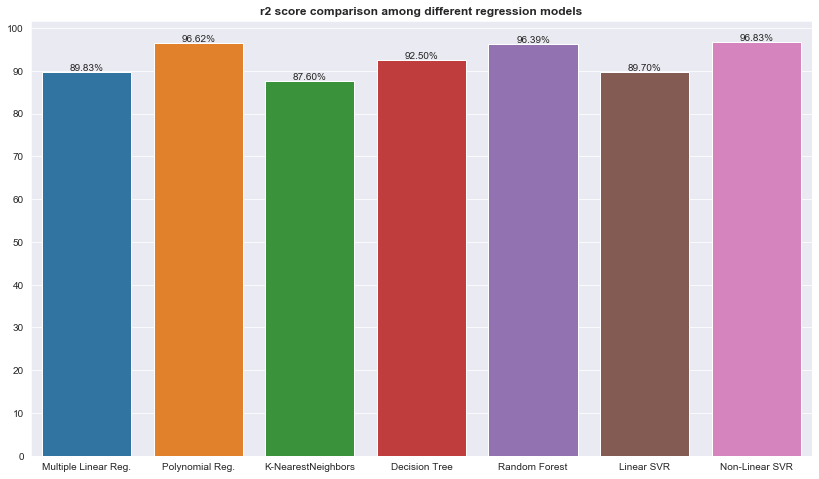

In [68]:
plt.figure(figsize=(14,8))
ax = sns.barplot(x=labelList,y=mylist)
plt.yticks(np.arange(0, 101, step=10))
plt.title('r2 score comparison among different regression models',fontweight='bold')
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.2f}%'.format(height), (x +0.25, y + height + 0.25))
plt.show()